In [1]:
import numpy as np
import pandas as pd 
import pymysql
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Training data
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

In [41]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [42]:
app_train['TARGET'].isnull().values.any()

False

In [ ]:
#Encoding (Label and one hot) on full dataset, then train-test split and then imputation on both train and test data

In [2]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [3]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 243)


In [4]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [5]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((246008, 242), (61503, 242), (246008,), (61503,))

In [6]:
features_train=features_train.fillna(features_train.median())

In [7]:
list_categorical=[]
for col in features_train:
    if features_train[col].dtype == 'object'  and features_train[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_train[col]
    features_train[col]=imputer.fit_transform(data)

In [8]:
features_test=features_test.fillna(features_test.median())

In [9]:
list_categorical=[]
for col in features_test:
    if features_test[col].dtype == 'object'  and features_test[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_test[col]
    features_test[col]=imputer.fit_transform(data)

In [23]:
app_train.fillna(app_train.median(), inplace=True)

In [28]:
app_train.isnull().values.any()

False

In [29]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [52]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((246008, 242), (61503, 242), (246008,), (61503,))

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

In [105]:
type(target_pred)

numpy.ndarray

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.911857958148383

In [58]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[56050,   488],
       [ 4933,    32]])

In [59]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(56050, 488, 4933, 32)

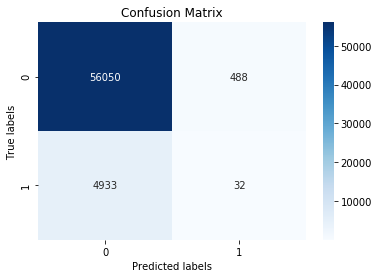

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [61]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.911857958148383

In [62]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.006445115810674723

In [63]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9913686370228872

In [64]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.06153846153846154

In [65]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9191086040371907

In [66]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.9384615384615385

In [67]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.011668185961713765

In [68]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.49890687641678094

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


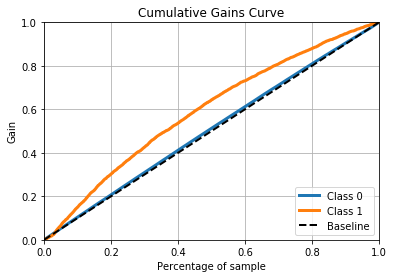

In [69]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


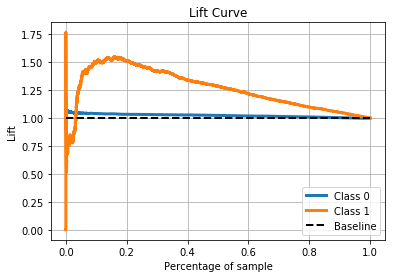

In [70]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

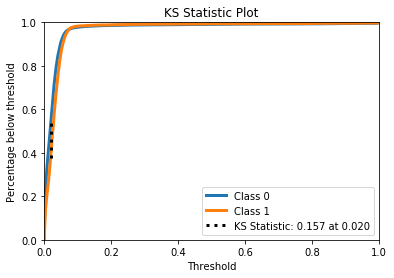

In [71]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

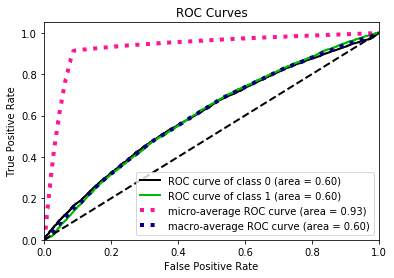

In [73]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Logistic Regression


In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(features_train, target_train)
target_pred = logreg.predict(features_test)
predicted_probas = logreg.predict_proba(features_test)

In [102]:
target_pred.shape

(61503,)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.9192559712534348

In [98]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[56537,     1],
       [ 4965,     0]])

In [99]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(56537, 1, 4965, 0)

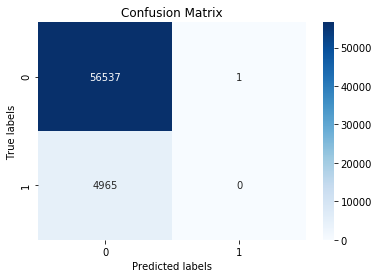

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [103]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.9192559712534348

In [104]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0

In [105]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999823127807846

In [106]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.0

In [107]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9192709180189262

In [108]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

1.0

In [109]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


0.0

In [110]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.4999911563903923

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


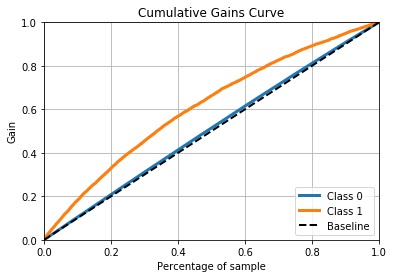

In [111]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


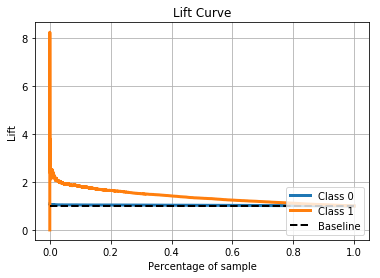

In [112]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

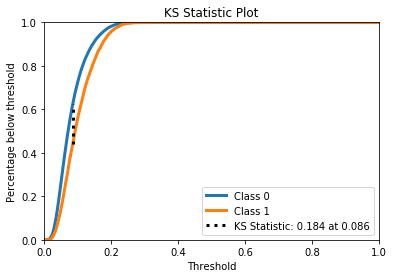

In [113]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

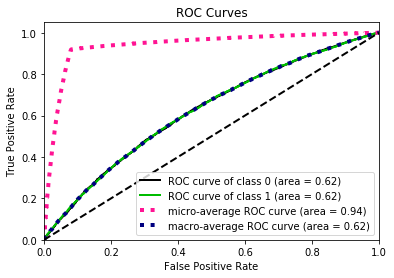

In [114]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas = clf.predict_proba(features_test)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.8506089133863389

In [117]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[51507,  5031],
       [ 4157,   808]])

In [118]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(51507, 5031, 4157, 808)

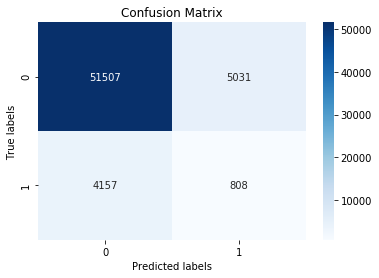

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [121]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.8506089133863389

In [122]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.16273917421953676

In [123]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.911015600127348

In [124]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.13837985956499402

In [125]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.925319775797643

In [126]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.861620140435006

In [127]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.1495742317660126

In [128]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.5368773871734424

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


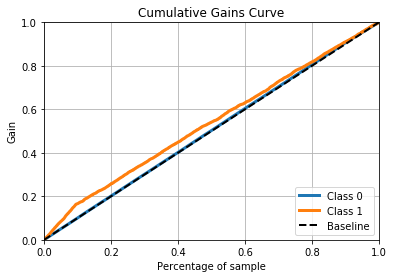

In [129]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


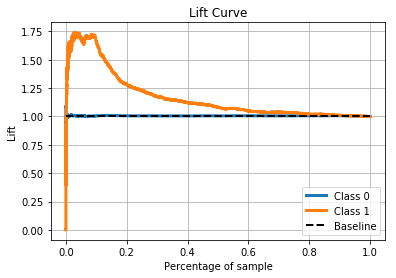

In [130]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

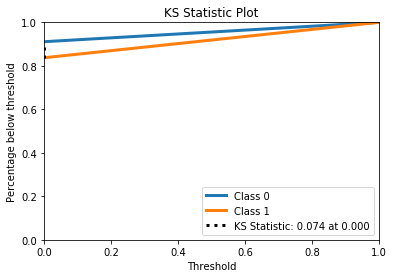

In [131]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

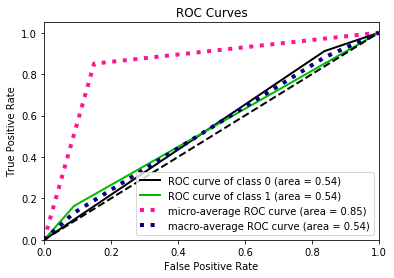

In [132]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='sigmoid',gamma='auto',probability=True).fit(features_train, target_train)

In [ ]:
target_pred = svc.predict(features_test)

In [ ]:
predicted_probas=svc.predict_proba(features_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

In [ ]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

In [ ]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

In [ ]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

In [ ]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

In [ ]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

In [ ]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

In [ ]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

In [ ]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

In [ ]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

In [ ]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

In [ ]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Random Forest

In [ ]:
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

In [ ]:
app_train.fillna(app_train.median(), inplace=True)

In [ ]:
list_categorical=[]
for col in app_train:
    if app_train[col].dtype == 'object'  and app_train[col].isnull().values.any():
        list_categorical.append(col)

In [ ]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=app_train[col]
    app_train[col]=imputer.fit_transform(data)

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)

In [ ]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [76]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.9193210087312814

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[56537,     1],
       [ 4961,     4]])

In [42]:
TN, FP, FN, TP = confusion_matrix(target_test, y_pred).ravel() 
TN, FP, FN, TP

(56537, 1, 4961, 4)

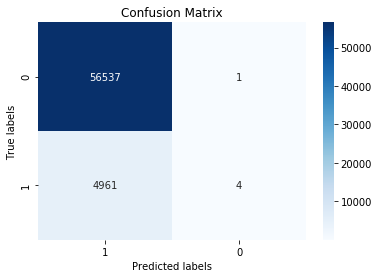

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [44]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0008056394763343404

In [45]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999823127807846

In [46]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.8

In [47]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9193307099417867

In [48]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.19999999999999996

In [49]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.0016096579476861167

In [50]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)

0.5003939761285594

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


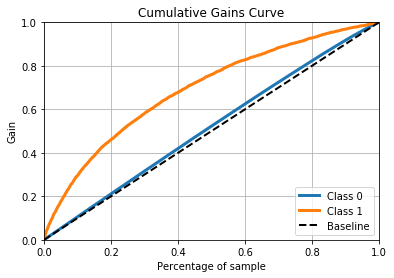

In [51]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


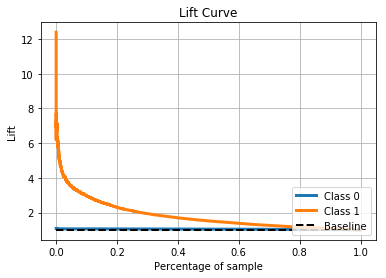

In [52]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

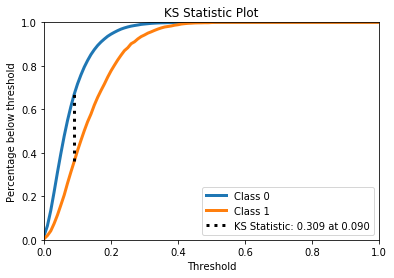

In [53]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

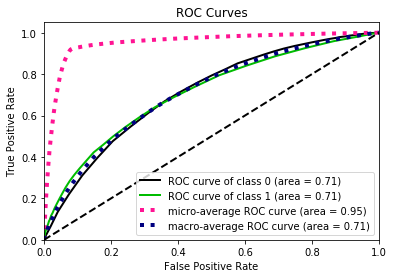

In [54]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

In [77]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

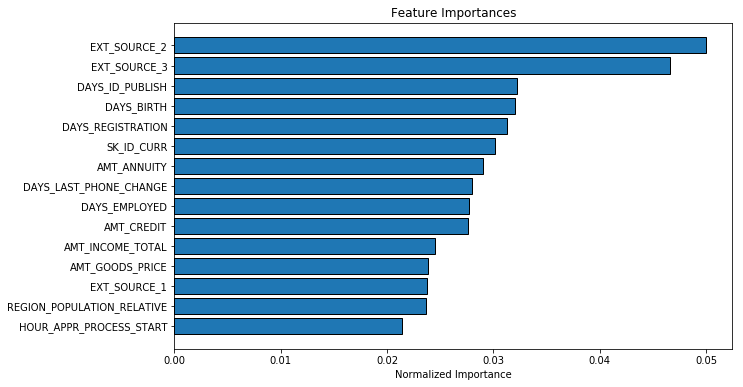

In [78]:
feature_importances_sorted = plot_feature_importances(feature_importances)

# Gradient Boosting Machine (GBM)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_depth = 3, random_state = 0)
    gb.fit(features_train, target_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(features_train, target_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(features_test, target_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.920
Accuracy score (validation): 0.919

Learning rate:  0.1
Accuracy score (training): 0.920
Accuracy score (validation): 0.920

Learning rate:  0.25
Accuracy score (training): 0.921
Accuracy score (validation): 0.919

Learning rate:  0.5
Accuracy score (training): 0.921
Accuracy score (validation): 0.918

Learning rate:  0.75
Accuracy score (training): 0.922
Accuracy score (validation): 0.917

Learning rate:  1
Accuracy score (training): 0.922
Accuracy score (validation): 0.916



In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
#Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gb.fit(features_train, target_train)
predictions = gb.predict(features_test)
predict_probs = gb.predict_proba(features_test)

print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print()
print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix:
[[56495    43]
 [ 4900    65]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.60      0.01      0.03      4965

avg / total       0.89      0.92      0.88     61503



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions)

0.9196299367510528

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions)
cnf_matrix

array([[56495,    43],
       [ 4900,    65]])

In [16]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions).ravel() 
TN, FP, FN, TP

(56495, 43, 4900, 65)

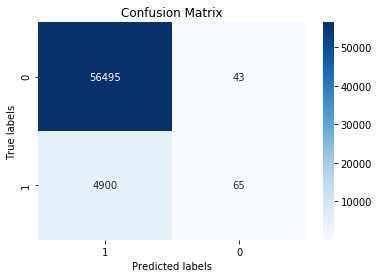

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [18]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.013091641490433032

In [19]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.999239449573738

In [20]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.6018518518518519

In [21]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9201889404674648

In [22]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.39814814814814814

In [23]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.025625862408831072

In [24]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions)

0.5061655455320855

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


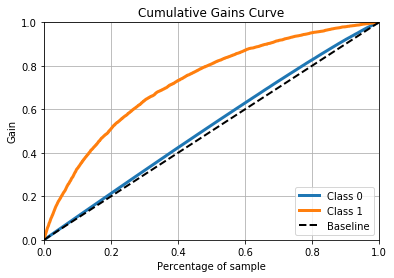

In [25]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predict_probs)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


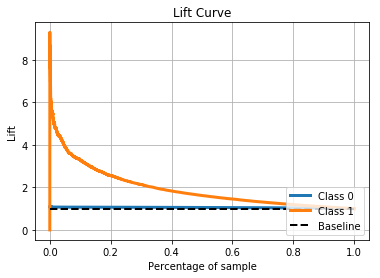

In [26]:
skplt.metrics.plot_lift_curve(target_test, predict_probs)
plt.show()

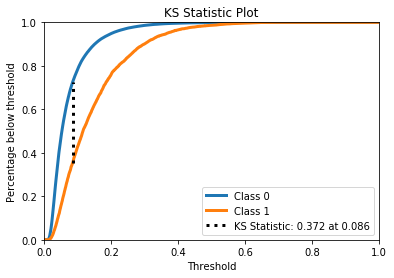

In [27]:
skplt.metrics.plot_ks_statistic(target_test, predict_probs)
plt.show()

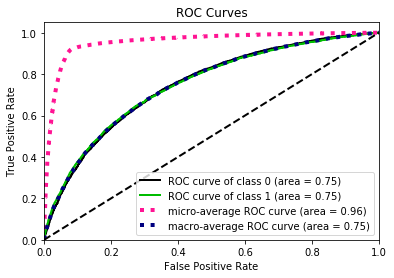

In [73]:
skplt.metrics.plot_roc(target_test, predict_probs)
plt.show()

In [79]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = gb.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

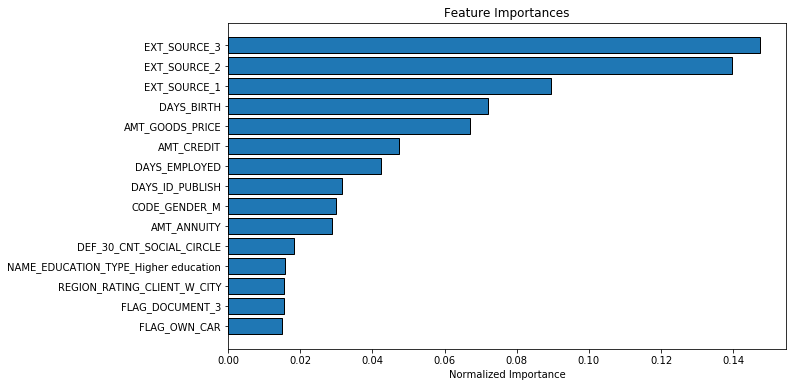

In [80]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [28]:
import dill as pickle

In [ ]:
filename = 'model_v1.pk'
with open('/Users/jayborkar/Desktop/Python3/'+filename, 'wb') as file:
     pickle.dump(gb, file)

In [2]:
app_test = pd.read_csv('/Users/jayborkar/Downloads/all/application_test.csv')

In [3]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [4]:
app_test.fillna(app_train.median(), inplace=True)

In [5]:
list_categorical=[]
for col in app_test:
    if app_test[col].dtype == 'object'  and app_test[col].isnull().values.any():
        list_categorical.append(col)

In [6]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=app_test[col]
    app_test[col]=imputer.fit_transform(data)

In [7]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_test:
    if app_test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_test[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_test[col])
            # Transform both training and testing data
            app_test[col] = le.transform(app_test[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [8]:
app_test = pd.get_dummies(app_test)
print('Training Features shape: ', app_test.shape)

Training Features shape:  (48744, 237)


In [2]:
from flask import Flask, request, jsonify

In [8]:
df.shape

(48744, 121)

In [9]:
df.isnull().values.any()

True

In [12]:
df.fillna(df.median(), inplace=True)

In [23]:
list_categorical=[]
for col in df:
    if df[col].dtype == 'object'  and df[col].isnull().values.any():
        list_categorical.append(col)

In [24]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=df[col]
    df[col]=imputer.fit_transform(data)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [26]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (48744, 238)


In [35]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 237)
Testing Features shape:  (48744, 236)


In [41]:
app_test.to_csv(r'/Users/jayborkar/Downloads/all/Final_Test.csv',index=False)

In [38]:
app_test.shape

(48744, 236)

In [36]:
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(features, target)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gb.fit(features, target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
import dill as pickle
clf = 'model.pk'

In [7]:
"""Setting the headers to send and accept json responses
"""
header = {'Content-Type': 'application/json', \
                  'Accept': 'application/json'}

"""Reading test batch
"""
df = pd.read_csv('/Users/jayborkar/Downloads/all/application_test.csv', encoding="utf-8-sig")
#df = df.head()

"""Converting Pandas Dataframe to json
"""
data = df.to_json(orient='records')

In [40]:
with open('/Users/jayborkar/Desktop/Python3/'+clf,'wb') as f:
     pickle.dump(gb, f)

In [3]:
import json
import requests
import pandas as pd

In [52]:
data = df.to_json(orient='records')

In [61]:
resp = requests.post("http://0.0.0.0:8080/predict", 
                    data = json.dumps(data),
                    headers= header)

In [62]:
resp.status_code

200

In [64]:
resp

<Response [200]>

In [63]:
resp.json()

{'predictions': '[{"0":100001,"1":1},{"0":100005,"1":1},{"0":100013,"1":1},{"0":100028,"1":0},{"0":100038,"1":1},{"0":100042,"1":1},{"0":100057,"1":1},{"0":100065,"1":0},{"0":100066,"1":1},{"0":100067,"1":0},{"0":100074,"1":1},{"0":100090,"1":1},{"0":100091,"1":1},{"0":100092,"1":1},{"0":100106,"1":0},{"0":100107,"1":1},{"0":100109,"1":0},{"0":100117,"1":1},{"0":100128,"1":1},{"0":100141,"1":1},{"0":100150,"1":0},{"0":100168,"1":0},{"0":100169,"1":1},{"0":100170,"1":1},{"0":100171,"1":1},{"0":100172,"1":1},{"0":100184,"1":1},{"0":100187,"1":1},{"0":100212,"1":1},{"0":100222,"1":1},{"0":100223,"1":1},{"0":100232,"1":1},{"0":100241,"1":1},{"0":100245,"1":1},{"0":100253,"1":0},{"0":100256,"1":0},{"0":100271,"1":1},{"0":100278,"1":1},{"0":100280,"1":1},{"0":100306,"1":1},{"0":100311,"1":1},{"0":100312,"1":1},{"0":100330,"1":1},{"0":100331,"1":1},{"0":100352,"1":1},{"0":100358,"1":1},{"0":100367,"1":1},{"0":100382,"1":1},{"0":100384,"1":1},{"0":100385,"1":1},{"0":100386,"1":0},{"0":100399,"

In [77]:
with open('/Users/jayborkar/Desktop/Python3/Predictions.json', 'wb') as outf:
    outf.write(resp.content)

In [1]:
import json

with open('/Users/jayborkar/Desktop/Python3/Predictions.json') as json_data:
    d = json.load(json_data)
    print(d)

{'predictions': '[{"0":100001,"1":1},{"0":100005,"1":1},{"0":100013,"1":1},{"0":100028,"1":0},{"0":100038,"1":1},{"0":100042,"1":1},{"0":100057,"1":1},{"0":100065,"1":0},{"0":100066,"1":1},{"0":100067,"1":0},{"0":100074,"1":1},{"0":100090,"1":1},{"0":100091,"1":1},{"0":100092,"1":1},{"0":100106,"1":0},{"0":100107,"1":1},{"0":100109,"1":0},{"0":100117,"1":1},{"0":100128,"1":1},{"0":100141,"1":1},{"0":100150,"1":0},{"0":100168,"1":0},{"0":100169,"1":1},{"0":100170,"1":1},{"0":100171,"1":1},{"0":100172,"1":1},{"0":100184,"1":1},{"0":100187,"1":1},{"0":100212,"1":1},{"0":100222,"1":1},{"0":100223,"1":1},{"0":100232,"1":1},{"0":100241,"1":1},{"0":100245,"1":1},{"0":100253,"1":0},{"0":100256,"1":0},{"0":100271,"1":1},{"0":100278,"1":1},{"0":100280,"1":1},{"0":100306,"1":1},{"0":100311,"1":1},{"0":100312,"1":1},{"0":100330,"1":1},{"0":100331,"1":1},{"0":100352,"1":1},{"0":100358,"1":1},{"0":100367,"1":1},{"0":100382,"1":1},{"0":100384,"1":1},{"0":100385,"1":1},{"0":100386,"1":0},{"0":100399,"

In [2]:
dd = d['predictions']

In [3]:
dd

'[{"0":100001,"1":1},{"0":100005,"1":1},{"0":100013,"1":1},{"0":100028,"1":0},{"0":100038,"1":1},{"0":100042,"1":1},{"0":100057,"1":1},{"0":100065,"1":0},{"0":100066,"1":1},{"0":100067,"1":0},{"0":100074,"1":1},{"0":100090,"1":1},{"0":100091,"1":1},{"0":100092,"1":1},{"0":100106,"1":0},{"0":100107,"1":1},{"0":100109,"1":0},{"0":100117,"1":1},{"0":100128,"1":1},{"0":100141,"1":1},{"0":100150,"1":0},{"0":100168,"1":0},{"0":100169,"1":1},{"0":100170,"1":1},{"0":100171,"1":1},{"0":100172,"1":1},{"0":100184,"1":1},{"0":100187,"1":1},{"0":100212,"1":1},{"0":100222,"1":1},{"0":100223,"1":1},{"0":100232,"1":1},{"0":100241,"1":1},{"0":100245,"1":1},{"0":100253,"1":0},{"0":100256,"1":0},{"0":100271,"1":1},{"0":100278,"1":1},{"0":100280,"1":1},{"0":100306,"1":1},{"0":100311,"1":1},{"0":100312,"1":1},{"0":100330,"1":1},{"0":100331,"1":1},{"0":100352,"1":1},{"0":100358,"1":1},{"0":100367,"1":1},{"0":100382,"1":1},{"0":100384,"1":1},{"0":100385,"1":1},{"0":100386,"1":0},{"0":100399,"1":1},{"0":10040

In [4]:
import json
import pandas as pd
jdata = json.loads(dd)
Predicitons = pd.DataFrame(jdata)

In [5]:
Predicitons.head()

0  1
0  100001  1
1  100005  1
2  100013  1
3  100028  0
4  100038  1

In [6]:
Predicitons['1'].value_counts()

1    41867
0     6877
Name: 1, dtype: int64

In [69]:
with open('/Users/jayborkar/Desktop/Python3/model.pk' ,'rb') as f:
    loaded_model = pickle.load(f)

In [70]:
loaded_model.predict(app_test)

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
pred=pd.DataFrame(loaded_model.predict(app_test))

In [50]:
pred.head()

0
0  0
1  0
2  0
3  0
4  0

In [73]:
pred[0].value_counts()

0    48677
1       67
Name: 0, dtype: int64

In [8]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value == 0:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

In [15]:
with open('view1.html', 'w') as f:
        f.write(Predicitons.style
         .applymap(color_negative_red)
         .set_properties(**{'font-size': '9pt', 'font-family': 'Calibri'})
         .bar( color='lightblue')
         .render())

In [3]:
import pandas as pd
train=pd.read_csv("/Users/jayborkar/Downloads/all/Train.csv")

In [4]:
train.shape

(307511, 235)

In [6]:
features = train.loc[:, train.columns != 'TARGET']
target = train.TARGET

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gb.fit(features, target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [8]:
import dill as pickle
clf = 'model.pk'

In [9]:
with open('/Users/jayborkar/Desktop/Python3/'+clf,'wb') as f:
     pickle.dump(gb, f)

In [10]:
test=pd.read_csv("/Users/jayborkar/Downloads/all/Test.csv")

In [11]:
gb.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
pred=pd.DataFrame(gb.predict(test))

In [16]:
pred.head()

0
0  0
1  0
2  0
3  0
4  0

In [14]:
pred[0].value_counts()

0    48690
1       54
Name: 0, dtype: int64

In [19]:
predictions = gb.predict_proba(test)[:, 1]

In [20]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
submit.head()

SK_ID_CURR    TARGET
0      100001  0.049472
1      100005  0.096155
2      100013  0.023748
3      100028  0.039187
4      100038  0.128979

In [22]:
submit.to_csv('/Users/jayborkar/Desktop/Python3/random_forest_baseline.csv', index = False)

# Deep Learning

In [10]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
features_train=np.array(features_train)
target_train=np.array(target_train)
features_test=np.array(features_test)
target_test=np.array(target_test)

In [12]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [13]:
target_train.shape

(246008,)

## Deep Neural network with 4 layers

4 layers with 2 hidden layer and the hidden layer has 80 neurons 

In [14]:
model = Sequential()
model.add(Dense(80, input_dim=242, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(features_train_scaled, target_train, epochs=500)

Epoch 1/500
246008/246008 [==============================] - 15s 61us/step - loss: 0.2602 - acc: 0.9193
Epoch 2/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2552 - acc: 0.9193
Epoch 3/500
246008/246008 [==============================] - 13s 52us/step - loss: 0.2542 - acc: 0.9193
Epoch 4/500
246008/246008 [==============================] - 13s 51us/step - loss: 0.2535 - acc: 0.9192
Epoch 5/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2529 - acc: 0.9192
Epoch 6/500
246008/246008 [==============================] - 12s 50us/step - loss: 0.2526 - acc: 0.9192 3s - lo
Epoch 7/500
246008/246008 [==============================] - 12s 51us/step - loss: 0.2521 - acc: 0.9193
Epoch 8/500
246008/246008 [==============================] - 13s 52us/step - loss: 0.2515 - acc: 0.9192
Epoch 9/500
246008/246008 [==============================] - 14s 58us/step - loss: 0.2513 - acc: 0.9193
Epoch 10/500
246008/246008 [============================

246008/246008 [==============================] - 13s 54us/step - loss: 0.2417 - acc: 0.9201 2s - loss: 0.2414 - acc: - ETA: 2s - loss: 0.2417 
Epoch 76/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2417 - acc: 0.9201
Epoch 77/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2417 - acc: 0.9201
Epoch 78/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2419 - acc: 0.9202
Epoch 79/500
246008/246008 [==============================] - 13s 53us/step - loss: 0.2415 - acc: 0.9203 0s - loss: 0.2417 
Epoch 80/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2414 - acc: 0.9202 0s - loss: 0
Epoch 81/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2415 - acc: 0.9201
Epoch 82/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2414 - acc: 0.9203 2s - loss: 0.2415 - 
Epoch 83/500
246008/246008 [==============================] - 13s 54u

246008/246008 [==============================] - 14s 57us/step - loss: 0.2409 - acc: 0.9203
Epoch 150/500
246008/246008 [==============================] - 14s 58us/step - loss: 0.2405 - acc: 0.9204
Epoch 151/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2409 - acc: 0.9206
Epoch 152/500
246008/246008 [==============================] - 16s 64us/step - loss: 0.2407 - acc: 0.9203 1s - 
Epoch 153/500
246008/246008 [==============================] - 14s 58us/step - loss: 0.2409 - acc: 0.9204
Epoch 154/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2405 - acc: 0.9203
Epoch 155/500
246008/246008 [==============================] - 12s 51us/step - loss: 0.2405 - acc: 0.9203
Epoch 156/500
246008/246008 [==============================] - 13s 55us/step - loss: 0.2404 - acc: 0.9204
Epoch 157/500
246008/246008 [==============================] - 13s 55us/step - loss: 0.2407 - acc: 0.9205
Epoch 158/500
246008/246008 [=========================

246008/246008 [==============================] - 14s 55us/step - loss: 0.2407 - acc: 0.9206
Epoch 225/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2409 - acc: 0.9206
Epoch 226/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2408 - acc: 0.9205
Epoch 227/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2405 - acc: 0.9207
Epoch 228/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2406 - acc: 0.9205
Epoch 229/500
246008/246008 [==============================] - 13s 53us/step - loss: 0.2406 - acc: 0.9207
Epoch 230/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2407 - acc: 0.9207
Epoch 231/500
246008/246008 [==============================] - 14s 57us/step - loss: 0.2407 - acc: 0.9205
Epoch 232/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2409 - acc: 0.9207 1s - loss:
Epoch 233/500
246008/246008 [====================

246008/246008 [==============================] - 14s 56us/step - loss: 0.2410 - acc: 0.9206
Epoch 298/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2413 - acc: 0.9208
Epoch 299/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2409 - acc: 0.9207
Epoch 300/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2411 - acc: 0.9208
Epoch 301/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2410 - acc: 0.9207 0s - loss: 0.2409 - acc: 
Epoch 302/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2412 - acc: 0.9206
Epoch 303/500
246008/246008 [==============================] - 14s 56us/step - loss: 0.2413 - acc: 0.9208
Epoch 304/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2415 - acc: 0.9207A: 1s - los
Epoch 305/500
246008/246008 [==============================] - 13s 54us/step - loss: 0.2415 - acc: 0.9203 0s - loss: 0.2415 - acc

246008/246008 [==============================] - 18s 71us/step - loss: 0.2423 - acc: 0.9207
Epoch 367/500
246008/246008 [==============================] - 18s 74us/step - loss: 0.2416 - acc: 0.9209
Epoch 368/500
246008/246008 [==============================] - 16s 64us/step - loss: 0.2420 - acc: 0.9206
Epoch 369/500
246008/246008 [==============================] - 16s 66us/step - loss: 0.2423 - acc: 0.9207 5s - ETA: 4s -
Epoch 370/500
246008/246008 [==============================] - 15s 63us/step - loss: 0.2420 - acc: 0.9208
Epoch 371/500
246008/246008 [==============================] - 16s 67us/step - loss: 0.2420 - acc: 0.9206
Epoch 372/500
246008/246008 [==============================] - 16s 66us/step - loss: 0.2420 - acc: 0.9208
Epoch 373/500
246008/246008 [==============================] - 15s 61us/step - loss: 0.2417 - acc: 0.9208
Epoch 374/500
246008/246008 [==============================] - 17s 67us/step - loss: 0.2419 - acc: 0.9208 3s - loss: 
Epoch 375/500
246008/246008 [====

246008/246008 [==============================] - 16s 63us/step - loss: 0.2422 - acc: 0.9207
Epoch 440/500
246008/246008 [==============================] - 15s 61us/step - loss: 0.2423 - acc: 0.9206
Epoch 441/500
246008/246008 [==============================] - 14s 57us/step - loss: 0.2424 - acc: 0.9207 0s - loss: 0.2424 - acc
Epoch 442/500
246008/246008 [==============================] - 15s 59us/step - loss: 0.2426 - acc: 0.9208
Epoch 443/500
246008/246008 [==============================] - 14s 57us/step - loss: 0.2423 - acc: 0.9207
Epoch 444/500
246008/246008 [==============================] - 14s 55us/step - loss: 0.2422 - acc: 0.9206
Epoch 445/500
246008/246008 [==============================] - 15s 60us/step - loss: 0.2420 - acc: 0.9207
Epoch 446/500
246008/246008 [==============================] - 14s 57us/step - loss: 0.2422 - acc: 0.9207 0s - loss: 0.2421 -
Epoch 447/500
246008/246008 [==============================] - ETA: 0s - loss: 0.2422 - acc: 0.9208- ETA: 1s - lo - 16s 64

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                19440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


In [79]:
test_loss, test_acc = model.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

61503/61503 [==============================] - 2s 27us/step
Test accuracy: 0.918735671417094


In [25]:
predictions = model.predict(features_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.9187356714306619

In [81]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[56475,    63],
       [ 4935,    30]])

In [85]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(56475, 63, 4935, 30)

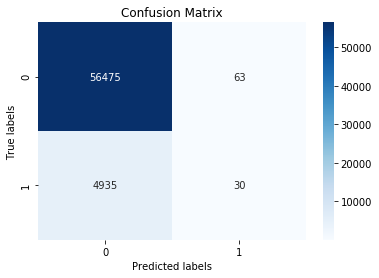

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [87]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.006042296072507553

In [88]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9988857051894301

In [89]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.3225806451612903

In [90]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9196384953590621

In [91]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.6774193548387097

In [92]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.011862396204033215

In [93]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.7116903274636346

## Deep Neural network with 5 layers

5 layers with 3 hidden layers, first and second hidden layer has 80 neurons and third hidden layer has 40 neurons

In [60]:
model_1 = Sequential()
model_1 .add(Dense(80, input_dim=242, activation='relu'))
model_1 .add(Dropout(0.2))
model_1 .add(Dense(80, activation='relu'))
model_1 .add(Dropout(0.2))
model_1 .add(Dense(40, activation='relu'))
model_1 .add(BatchNormalization())
model_1 .add(Dense(1, activation='sigmoid'))

In [61]:
model_1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model_1.fit(features_train_scaled, target_train, epochs=400)

Epoch 1/400
246008/246008 [==============================] - 19s 77us/step - loss: 0.2673 - acc: 0.9166
Epoch 2/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2557 - acc: 0.9192
Epoch 3/400
246008/246008 [==============================] - 17s 70us/step - loss: 0.2544 - acc: 0.9191
Epoch 4/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2541 - acc: 0.9192
Epoch 5/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2535 - acc: 0.9191
Epoch 6/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2528 - acc: 0.9192
Epoch 7/400
246008/246008 [==============================] - 18s 75us/step - loss: 0.2527 - acc: 0.9192
Epoch 8/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2519 - acc: 0.9191
Epoch 9/400
246008/246008 [==============================] - 18s 73us/step - loss: 0.2516 - acc: 0.9191
Epoch 10/400
246008/246008 [==============================] - 18

246008/246008 [==============================] - 17s 69us/step - loss: 0.2420 - acc: 0.9199
Epoch 79/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2412 - acc: 0.9198
Epoch 80/400
246008/246008 [==============================] - 16s 65us/step - loss: 0.2414 - acc: 0.9199
Epoch 81/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2415 - acc: 0.9199
Epoch 82/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2414 - acc: 0.9197
Epoch 83/400
246008/246008 [==============================] - 17s 67us/step - loss: 0.2415 - acc: 0.9200
Epoch 84/400
246008/246008 [==============================] - 16s 67us/step - loss: 0.2414 - acc: 0.9199
Epoch 85/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2414 - acc: 0.9202
Epoch 86/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2411 - acc: 0.9197
Epoch 87/400
246008/246008 [==============================] - 16s 66

246008/246008 [==============================] - 16s 66us/step - loss: 0.2394 - acc: 0.9205
Epoch 155/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2396 - acc: 0.9205
Epoch 156/400
246008/246008 [==============================] - 16s 67us/step - loss: 0.2393 - acc: 0.9205
Epoch 157/400
246008/246008 [==============================] - 16s 66us/step - loss: 0.2398 - acc: 0.9203
Epoch 158/400
246008/246008 [==============================] - 18s 73us/step - loss: 0.2395 - acc: 0.9205 1s 
Epoch 159/400
246008/246008 [==============================] - 17s 70us/step - loss: 0.2395 - acc: 0.9205
Epoch 160/400
246008/246008 [==============================] - 17s 69us/step - loss: 0.2392 - acc: 0.9206
Epoch 161/400
246008/246008 [==============================] - 17s 69us/step - loss: 0.2392 - acc: 0.9205
Epoch 162/400
246008/246008 [==============================] - 17s 67us/step - loss: 0.2393 - acc: 0.9205
Epoch 163/400
246008/246008 [===========================

246008/246008 [==============================] - 16s 65us/step - loss: 0.2388 - acc: 0.9208
Epoch 231/400
246008/246008 [==============================] - 15s 63us/step - loss: 0.2390 - acc: 0.9208
Epoch 232/400
246008/246008 [==============================] - 15s 63us/step - loss: 0.2389 - acc: 0.9208
Epoch 233/400
246008/246008 [==============================] - 16s 65us/step - loss: 0.2388 - acc: 0.9208
Epoch 234/400
246008/246008 [==============================] - 25s 100us/step - loss: 0.2384 - acc: 0.9207
Epoch 235/400
246008/246008 [==============================] - 18s 74us/step - loss: 0.2389 - acc: 0.9208 1s - loss
Epoch 236/400
246008/246008 [==============================] - 17s 69us/step - loss: 0.2389 - acc: 0.9206
Epoch 237/400
246008/246008 [==============================] - 18s 72us/step - loss: 0.2386 - acc: 0.9207
Epoch 238/400
246008/246008 [==============================] - 17s 69us/step - loss: 0.2384 - acc: 0.9207
Epoch 239/400
246008/246008 [====================

246008/246008 [==============================] - 17s 71us/step - loss: 0.2380 - acc: 0.9208
Epoch 307/400
246008/246008 [==============================] - 16s 67us/step - loss: 0.2386 - acc: 0.9208
Epoch 308/400
246008/246008 [==============================] - 18s 73us/step - loss: 0.2387 - acc: 0.9208
Epoch 309/400
246008/246008 [==============================] - 17s 70us/step - loss: 0.2387 - acc: 0.9208
Epoch 310/400
246008/246008 [==============================] - 18s 75us/step - loss: 0.2385 - acc: 0.9208 0s - loss: 0.
Epoch 311/400
246008/246008 [==============================] - 17s 70us/step - loss: 0.2384 - acc: 0.9209
Epoch 312/400
246008/246008 [==============================] - 19s 77us/step - loss: 0.2385 - acc: 0.9211
Epoch 313/400
246008/246008 [==============================] - 18s 74us/step - loss: 0.2383 - acc: 0.9208
Epoch 314/400
246008/246008 [==============================] - 19s 76us/step - loss: 0.2386 - acc: 0.9208
Epoch 315/400
246008/246008 [=================

246008/246008 [==============================] - 17s 69us/step - loss: 0.2387 - acc: 0.9208
Epoch 382/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2383 - acc: 0.9207
Epoch 383/400
246008/246008 [==============================] - 17s 69us/step - loss: 0.2380 - acc: 0.9210
Epoch 384/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2379 - acc: 0.9209 1s - 
Epoch 385/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2382 - acc: 0.9209
Epoch 386/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2381 - acc: 0.9209
Epoch 387/400
246008/246008 [==============================] - 17s 70us/step - loss: 0.2376 - acc: 0.9210
Epoch 388/400
246008/246008 [==============================] - 17s 68us/step - loss: 0.2377 - acc: 0.9210
Epoch 389/400
246008/246008 [==============================] - 19s 78us/step - loss: 0.2383 - acc: 0.9208
Epoch 390/400
246008/246008 [=========================

In [78]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 80)                19440     
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_6 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 40)                3240      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total para

In [66]:
preds = model_1.predict(features_test_scaled)

In [65]:
test_loss, test_acc = model_1.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

61503/61503 [==============================] - 2s 25us/step
Test accuracy: 0.9178576654661649


In [68]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, preds.round())
cnf_matrix

array([[56350,   188],
       [ 4864,   101]])

In [69]:
TN, FP, FN, TP = confusion_matrix(target_test, preds.round()).ravel() 
TN, FP, FN, TP

(56350, 188, 4864, 101)

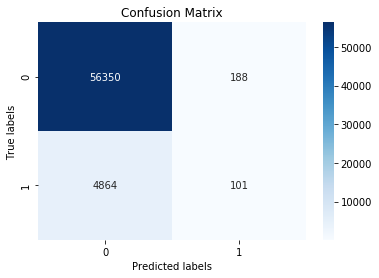

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [71]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.020342396777442096

In [72]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9966748027875058

In [73]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.3494809688581315

In [74]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9205410527003627

In [75]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.6505190311418685

In [76]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.03844689760182718

In [94]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, preds )

0.6986940419934127

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, preds)

In [ ]:
x_val = features_train[:10000]
partial_x_train = features_train[10000:]

y_val = target_test[:10000]
partial_y_train = target_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
results = model.evaluate(features_test,target_test)

print(results)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()